<a href="https://colab.research.google.com/github/annefrancine/Machine_Learning/blob/master/Marketing_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset : Google Analytics 360

The Google Merchandise Store sells Google branded merchandise. The data is typical of what you would see for an ecommerce website.

The sample dataset contains Google Analytics 360 data from the Google Merchandise Store, a real ecommerce store. The Google Merchandise Store sells Google branded merchandise. The data is typical of what you would see for an ecommerce website. It includes the following kinds of information:

- Traffic source data: information about where website visitors originate. This includes data about organic traffic, paid search traffic, display traffic, etc.

- Content data: information about the behavior of users on the site. This includes the URLs of pages that visitors look at, how they interact with content, etc.

- Transactional data: information about the transactions that occur on the Google Merchandise Store website.

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv')

In [3]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [4]:
df.shape

(12283, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


In [6]:
# saber a quantidade de usuarios unicos
len(df.fullVisitorId.unique())

9996

dentre 12283 transações existem 9996 usuarios unicos

In [7]:
data =df.date.iloc[0]
data

20160902

In [8]:
type (data)

numpy.int64

In [9]:
data =str(df.date.iloc[0])
data[0:4]

'2016'

In [0]:
# identify the columns date, fullvisitorid, visitid as an object
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv', dtype={'date':object,'fullVisitorId':object,'VisitId':object})

In [11]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [12]:
df.device.iloc[0]#j format json

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [13]:
type(df.device.iloc[0])

str


#Convert to a dictionary

In [14]:
import json
json.loads(df.device.iloc[0])

{'browser': 'Chrome',
 'browserSize': 'not available in demo dataset',
 'browserVersion': 'not available in demo dataset',
 'deviceCategory': 'desktop',
 'flashVersion': 'not available in demo dataset',
 'isMobile': False,
 'language': 'not available in demo dataset',
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset'}

In [15]:
type(json.loads(df.device.iloc[0]))

dict

In [16]:
# create a list
[json.loads(row) for row in df.device]

[{'browser': 'Chrome',
  'browserSize': 'not available in demo dataset',
  'browserVersion': 'not available in demo dataset',
  'deviceCategory': 'desktop',
  'flashVersion': 'not available in demo dataset',
  'isMobile': False,
  'language': 'not available in demo dataset',
  'mobileDeviceBranding': 'not available in demo dataset',
  'mobileDeviceInfo': 'not available in demo dataset',
  'mobileDeviceMarketingName': 'not available in demo dataset',
  'mobileDeviceModel': 'not available in demo dataset',
  'mobileInputSelector': 'not available in demo dataset',
  'operatingSystem': 'Windows',
  'operatingSystemVersion': 'not available in demo dataset',
  'screenColors': 'not available in demo dataset',
  'screenResolution': 'not available in demo dataset'},
 {'browser': 'Chrome',
  'browserSize': 'not available in demo dataset',
  'browserVersion': 'not available in demo dataset',
  'deviceCategory': 'desktop',
  'flashVersion': 'not available in demo dataset',
  'isMobile': False,
  '

In [17]:
pd.DataFrame([json.loads(row) for row in df.device])

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [0]:
dicionarios = ['device','geoNetwork','trafficSource','totals']

In [0]:
for coluna in dicionarios:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [20]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""n

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   channelGrouping            12283 non-null  object
 1   date                       12283 non-null  object
 2   device                     12283 non-null  object
 3   fullVisitorId              12283 non-null  object
 4   geoNetwork                 12283 non-null  object
 5   sessionId                  12283 non-null  object
 6   socialEngagementType       12283 non-null  object
 7   totals                     12283 non-null  object
 8   trafficSource              12283 non-null  object
 9   visitId                    12283 non-null  int64 
 10  visitNumber                12283 non-null  int64 
 11  visitStartTime             12283 non-null  int64 
 12  browser                    12283 non-null  object
 13  browserVersion             12283 non-null  object
 14  browse

In [0]:
#  remove the columns ['device','geoNetwork','trafficSource','totals']
df.drop(dicionarios, axis=1, inplace=True)

In [23]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not avail

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   channelGrouping            12283 non-null  object
 1   date                       12283 non-null  object
 2   fullVisitorId              12283 non-null  object
 3   sessionId                  12283 non-null  object
 4   socialEngagementType       12283 non-null  object
 5   visitId                    12283 non-null  int64 
 6   visitNumber                12283 non-null  int64 
 7   visitStartTime             12283 non-null  int64 
 8   browser                    12283 non-null  object
 9   browserVersion             12283 non-null  object
 10  browserSize                12283 non-null  object
 11  operatingSystem            12283 non-null  object
 12  operatingSystemVersion     12283 non-null  object
 13  isMobile                   12283 non-null  bool  
 14  mobile

## Cleaning Data

In [25]:
df.channelGrouping.unique()

array(['Organic Search', 'Affiliates', 'Direct', 'Social', 'Display',
       'Paid Search', 'Referral', '(Other)'], dtype=object)

In [26]:
len(df.channelGrouping.unique())

8

In [27]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'browser', 'browserVersion', 'browserSize', 'operatingSystem',
       'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding',
       'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo',
       'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors',
       'screenResolution', 'deviceCategory', 'continent', 'subContinent',
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'campaign', 'source',
       'medium', 'keyword', 'adwordsClickInfo', 'isTrueDirect', 'referralPath',
       'adContent', 'campaignCode', 'visits', 'hits', 'pageviews', 'bounces',
       'newVisits', 'transactionRevenue'],
      dtype='object')

In [28]:
for coluna in df.columns:
    print(coluna + ': ' + str(len(df[coluna].unique())))
# some columns have a value, they don't add anything to the dataset (I can remove)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129


TypeError: ignored

In [29]:
coluna # identify the column that gave an error

'adwordsClickInfo'

In [30]:
df['adwordsClickInfo'] # it's a dictionary

0        {'criteriaParameters': 'not available in demo ...
1        {'criteriaParameters': 'not available in demo ...
2        {'criteriaParameters': 'not available in demo ...
3        {'criteriaParameters': 'not available in demo ...
4        {'criteriaParameters': 'not available in demo ...
                               ...                        
12278    {'criteriaParameters': 'not available in demo ...
12279    {'criteriaParameters': 'not available in demo ...
12280    {'criteriaParameters': 'not available in demo ...
12281    {'criteriaParameters': 'not available in demo ...
12282    {'criteriaParameters': 'not available in demo ...
Name: adwordsClickInfo, Length: 12283, dtype: object

In [0]:
df.drop('adwordsClickInfo',axis=1,inplace=True)

In [32]:
coluna_na = []# create list
for coluna in df.columns:
    print(coluna + ': ' + str(len(df[coluna].unique())))
    if len(df[coluna].unique()) == 1:
        coluna_na.append(coluna)# For the column with a value, it will be added to the list

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [33]:
coluna_na
# columns with a single value 
#it's better to remove them as it does not add any information to the dataset

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [34]:
len(coluna_na)

18

In [0]:
df.drop(coluna_na,axis=1,inplace=True)

In [36]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   channelGrouping     12283 non-null  object
 1   date                12283 non-null  object
 2   fullVisitorId       12283 non-null  object
 3   sessionId           12283 non-null  object
 4   visitId             12283 non-null  int64 
 5   visitNumber         12283 non-null  int64 
 6   visitStartTime      12283 non-null  int64 
 7   browser             12283 non-null  object
 8   operatingSystem     12283 non-null  object
 9   isMobile            12283 non-null  bool  
 10  deviceCategory      12283 non-null  object
 11  continent           12283 non-null  object
 12  subContinent        12283 non-null  object
 13  country             12283 non-null  object
 14  region              12283 non-null  object
 15  metro               12283 non-null  object
 16  city                12

In [0]:
quant = ['bounces', 'hits','newVisits','pageviews', 'transactionRevenue']

In [0]:
for coluna in quant:
    df[coluna] = pd.to_numeric(df[coluna])

In [40]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                 int64
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
dtype: object

In [41]:
df.transactionRevenue

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12278   NaN
12279   NaN
12280   NaN
12281   NaN
12282   NaN
Name: transactionRevenue, Length: 12283, dtype: float64

In [42]:
df.transactionRevenue.value_counts()

19190000.0     3
33590000.0     3
13590000.0     3
55990000.0     2
18990000.0     2
              ..
374850000.0    1
74850000.0     1
291070000.0    1
23960000.0     1
16780000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [43]:
df.transactionRevenue.isna().sum()

12119

In [44]:
df.shape

(12283, 31)

In [0]:
df.transactionRevenue.fillna(0, inplace=True)

In [46]:
df.transactionRevenue.value_counts()

0.0            12119
33590000.0         3
13590000.0         3
19190000.0         3
31490000.0         2
               ...  
374850000.0        1
74850000.0         1
291070000.0        1
23960000.0         1
372650000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

In [0]:
df.transactionRevenue = df.transactionRevenue / 1000000

In [48]:
df.transactionRevenue.value_counts()

0.00      12119
19.19         3
13.59         3
33.59         3
27.19         2
          ...  
253.77        1
239.88        1
88.05         1
112.05        1
26.49         1
Name: transactionRevenue, Length: 147, dtype: int64

In [49]:
len(set(df.fullVisitorId))

9997

## Feature Engineering

In [0]:
df_quant = df.groupby('fullVisitorId',as_index=False)[quant].sum()

In [51]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [52]:
df_quant.shape

(9997, 6)

## Separating databse

In [0]:
y = df_quant.transactionRevenue.copy()

In [0]:
X = df_quant.drop('transactionRevenue',axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [57]:
X_train.shape

(6997, 5)

In [58]:
X_test.shape

(3000, 5)

## Linear regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression()

In [61]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg_predict = reg.predict(X_test)

In [63]:
reg_predict

array([1.74444021, 2.00631137, 1.73174175, ..., 1.63111886, 1.84544354,
       1.77408158])

In [64]:
X_test.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
5891,6169514047682040410,0.0,5,1.0,5
898,1668862201013184148,1.0,1,1.0,1
6148,6387756387875670783,1.0,1,1.0,1
5325,5706521914151458143,1.0,1,1.0,1
7978,8114490574727983120,1.0,12,1.0,10


## Analyzing the results

In [0]:
results = pd.DataFrame()

In [0]:
results = pd.DataFrame()
results['revenue'] = y_test#how much the user actually bought
results['predict'] = reg_predict# forecast
results['error'] = reg_predict - y_test # difference between forecast and what was spent

In [67]:
results.head()

,revenue,predict,error
5891,0.0,1.744440,1.744440
898,0.0,2.006311,2.006311
6148,0.0,1.731742,1.731742
5325,0.0,1.771379,1.771379
7978,0.0,1.631271,1.631271


In [68]:
results[results.revenue > 0]

,revenue,predict,error
4908,372.65,1.794398,-370.855602
3916,14.98,1.848763,-13.131237
467,67.19,2.029743,-65.160257
6698,299.16,1.699360,-297.460640
9733,67.12,1.536203,-65.583797
8646,367.04,1.594096,-365.445904
7778,52.49,1.641288,-50.848712
3656,217.44,1.862166,-215.577834
8542,25.90,1.599956,-24.300044
5528,23.49,1.761851,-21.728149


In [0]:
import numpy as np

In [70]:
#MSE
np.mean((reg_predict - y_test)**2)

408.9894229982793

In [71]:
#RMSE
np.sqrt(np.mean((reg_predict - y_test)**2))

20.223486914928376

In [0]:
from sklearn.metrics import mean_squared_error

In [73]:
np.sqrt(mean_squared_error(y_test,reg_predict))#MSE

20.223486914928372

In [74]:
np.mean(df_quant.transactionRevenue)

1.778953686105831

In [75]:
np.std(df_quant.transactionRevenue)

25.129905708017944

In [76]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


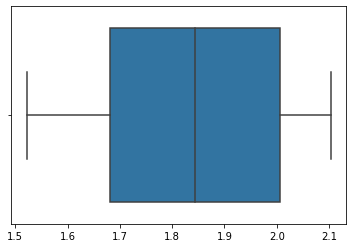

In [77]:
sns.boxplot(reg_predict);

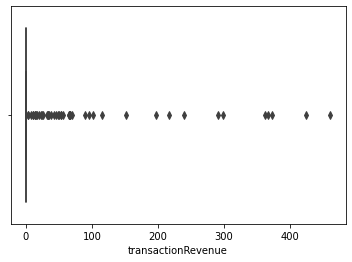

In [78]:
sns.boxplot(y_test);

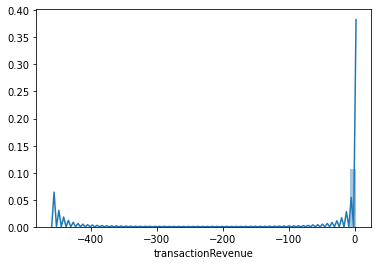

In [79]:
sns.distplot(reg_predict - y_test);

## Improving the featuring Engineering

In [0]:
visits_last = df.groupby('fullVisitorId',as_index=False)

In [0]:
visits_last= visits_last['visitNumber'].max()

In [82]:
visits_last.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [83]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [0]:
single_visit_users = df.drop_duplicates(subset=['fullVisitorId','visitNumber'])

In [85]:
single_visit_users.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [86]:
single_visit_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12270 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12270 non-null  object 
 1   date                12270 non-null  object 
 2   fullVisitorId       12270 non-null  object 
 3   sessionId           12270 non-null  object 
 4   visitId             12270 non-null  int64  
 5   visitNumber         12270 non-null  int64  
 6   visitStartTime      12270 non-null  int64  
 7   browser             12270 non-null  object 
 8   operatingSystem     12270 non-null  object 
 9   isMobile            12270 non-null  bool   
 10  deviceCategory      12270 non-null  object 
 11  continent           12270 non-null  object 
 12  subContinent        12270 non-null  object 
 13  country             12270 non-null  object 
 14  region              12270 non-null  object 
 15  metro               12270 non-null  object 
 16  city

In [0]:
visits = pd.merge(visits_last,single_visit_users,left_on=['fullVisitorId','visitNumber'],
                  right_on=['fullVisitorId','visitNumber'],how='left')

In [88]:
visits.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [89]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fullVisitorId       9997 non-null   object 
 1   visitNumber         9997 non-null   int64  
 2   channelGrouping     9997 non-null   object 
 3   date                9997 non-null   object 
 4   sessionId           9997 non-null   object 
 5   visitId             9997 non-null   int64  
 6   visitStartTime      9997 non-null   int64  
 7   browser             9997 non-null   object 
 8   operatingSystem     9997 non-null   object 
 9   isMobile            9997 non-null   bool   
 10  deviceCategory      9997 non-null   object 
 11  continent           9997 non-null   object 
 12  subContinent        9997 non-null   object 
 13  country             9997 non-null   object 
 14  region              9997 non-null   object 
 15  metro               9997 non-null   object 
 16  city  

In [0]:
first_visit = df.groupby('fullVisitorId',as_index=False)

In [0]:
first_visit = first_visit['visitNumber'].min()

In [92]:
first_visit.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [0]:
first_visit.set_index('fullVisitorId',inplace=True)

In [94]:
first_visit.head()

,visitNumber
fullVisitorId,
0002365800130207040,1
0010286039787739137,1
0011056874471185769,1
0014443856125569702,1
0017260116665815114,6


In [0]:

visits = visits.join(first_visit,how='left',on='fullVisitorId',rsuffix='_first')

In [96]:
visits.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumber_first
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [97]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fullVisitorId       9997 non-null   object 
 1   visitNumber         9997 non-null   int64  
 2   channelGrouping     9997 non-null   object 
 3   date                9997 non-null   object 
 4   sessionId           9997 non-null   object 
 5   visitId             9997 non-null   int64  
 6   visitStartTime      9997 non-null   int64  
 7   browser             9997 non-null   object 
 8   operatingSystem     9997 non-null   object 
 9   isMobile            9997 non-null   bool   
 10  deviceCategory      9997 non-null   object 
 11  continent           9997 non-null   object 
 12  subContinent        9997 non-null   object 
 13  country             9997 non-null   object 
 14  region              9997 non-null   object 
 15  metro               9997 non-null   object 
 16  city  

In [0]:
visits = pd.merge(visits,single_visit_users,left_on=['fullVisitorId','visitNumber_first'],
                  right_on=['fullVisitorId','visitNumber'],how='left', suffixes=['_last','_first'])

In [99]:
visits.head()

,fullVisitorId,visitNumber_last,channelGrouping_last,date_last,sessionId_last,visitId_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,region_last,metro_last,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,hits_last,pageviews_last,bounces_last,newVisits_last,transactionRevenue_last,visitNumber_first,channelGrouping_first,date_first,sessionId_first,visitId_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,continent_first,subContinent_first,country_first,region_first,metro_first,city_first,networkDomain_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,hits_first,pageviews_first,bounces_first,newVisits_first,transactionRevenue_first
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [100]:
visits.shape

(9997, 62)

# Cleaning Data

In [101]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [0]:
for coluna in quant:
    visits.drop(coluna + '_last',axis=1,inplace=True)# coluna = column
    visits.drop(coluna + '_first',axis=1,inplace=True)

In [103]:
visits.head()

,fullVisitorId,visitNumber_last,channelGrouping_last,date_last,sessionId_last,visitId_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,region_last,metro_last,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,visitNumber_first,channelGrouping_first,date_first,sessionId_first,visitId_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,continent_first,subContinent_first,country_first,region_first,metro_first,city_first,networkDomain_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [104]:
visits.shape

(9997, 52)

In [0]:
ids = ['sessionId_last','visitId_last','sessionId_first', 'visitId_first']

In [0]:
visits.drop(ids,axis=1,inplace=True)

In [107]:
visits.shape

(9997, 48)

In [108]:
visits.columns

Index(['fullVisitorId', 'visitNumber_last', 'channelGrouping_last',
       'date_last', 'visitStartTime_last', 'browser_last',
       'operatingSystem_last', 'isMobile_last', 'deviceCategory_last',
       'continent_last', 'subContinent_last', 'country_last', 'region_last',
       'metro_last', 'city_last', 'networkDomain_last', 'campaign_last',
       'source_last', 'medium_last', 'keyword_last', 'isTrueDirect_last',
       'referralPath_last', 'adContent_last', 'campaignCode_last',
       'visitNumber_first', 'channelGrouping_first', 'date_first',
       'visitNumber_first', 'visitStartTime_first', 'browser_first',
       'operatingSystem_first', 'isMobile_first', 'deviceCategory_first',
       'continent_first', 'subContinent_first', 'country_first',
       'region_first', 'metro_first', 'city_first', 'networkDomain_first',
       'campaign_first', 'source_first', 'medium_first', 'keyword_first',
       'isTrueDirect_first', 'referralPath_first', 'adContent_first',
       'campaignC

In [0]:
geo = ['city_first','continent_first','country_first','metro_first','region_first',
      'networkDomain_first','subContinent_first']

In [0]:

visits.drop(geo,axis=1,inplace=True)

In [111]:
visits.shape

(9997, 41)

## Create new variables

In [112]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [0]:
visits = pd.merge(visits,df_quant,left_on=['fullVisitorId'],
                  right_on=['fullVisitorId'],how='left')

In [114]:
visits.head()

,fullVisitorId,visitNumber_last,channelGrouping_last,date_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,region_last,metro_last,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,visitNumber_first,channelGrouping_first,date_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


In [115]:
visits.shape

(9997, 46)

In [0]:
visits['tempo_dif'] = visits.visitStartTime_last - visits.visitStartTime_first

In [117]:
visits.shape

(9997, 47)

In [118]:
visits.head()

,fullVisitorId,visitNumber_last,channelGrouping_last,date_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,region_last,metro_last,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,visitNumber_first,channelGrouping_first,date_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0


In [0]:
visits_ = df.groupby('fullVisitorId',as_index=False).count().visitNumber.values


In [120]:
visits_

array([1, 1, 1, ..., 1, 1, 2])

In [0]:
visits['visits_'] = visits_

In [122]:
visits.head()

,fullVisitorId,visitNumber_last,channelGrouping_last,date_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,region_last,metro_last,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,visitNumber_first,channelGrouping_first,date_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits_
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1


In [123]:
data = '20160904'
data

'20160904'

In [124]:
data[0:4]

'2016'

In [125]:
data[4:6]

'09'

In [126]:
data[6:8]

'04'

In [0]:
visits['year_last'] = pd.to_numeric([data[0:4] for data in visits.date_last])
visits['month_last'] = pd.to_numeric([data[4:6] for data in visits.date_last])
visits['day_last'] = pd.to_numeric([data[6:8] for data in visits.date_last])

visits['year_first'] = pd.to_numeric([data[0:4] for data in visits.date_first])
visits['month_first'] = pd.to_numeric([data[4:6] for data in visits.date_first])
visits['day_first'] = pd.to_numeric([data[6:8] for data in visits.date_first])

In [128]:
visits.head()

,fullVisitorId,visitNumber_last,channelGrouping_last,date_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,region_last,metro_last,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,visitNumber_first,channelGrouping_first,date_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits_,year_last,month_last,day_last,year_first,month_first,day_first
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1,2017,4,20,2017,4,20


In [129]:
visits.dtypes

fullVisitorId             object
visitNumber_last           int64
channelGrouping_last      object
date_last                 object
visitStartTime_last        int64
browser_last              object
operatingSystem_last      object
isMobile_last               bool
deviceCategory_last       object
continent_last            object
subContinent_last         object
country_last              object
region_last               object
metro_last                object
city_last                 object
networkDomain_last        object
campaign_last             object
source_last               object
medium_last               object
keyword_last              object
isTrueDirect_last         object
referralPath_last         object
adContent_last            object
campaignCode_last         object
visitNumber_first          int64
channelGrouping_first     object
date_first                object
visitNumber_first          int64
visitStartTime_first       int64
browser_first             object
operatingS

## Separating the dataset

In [0]:
visits.drop('fullVisitorId',axis=1,inplace=True)

In [0]:
y = visits.transactionRevenue.copy()

In [0]:
X = visits.drop('transactionRevenue',axis=1)

In [133]:
X.head()

,visitNumber_last,channelGrouping_last,date_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,region_last,metro_last,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,visitNumber_first,channelGrouping_first,date_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,bounces,hits,newVisits,pageviews,tempo_dif,visits_,year_last,month_last,day_last,year_first,month_first,day_first
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20


In [136]:
quali = visits.dtypes[visits.dtypes == object].keys()
quali

Index(['channelGrouping_last', 'date_last', 'browser_last',
       'operatingSystem_last', 'deviceCategory_last', 'continent_last',
       'subContinent_last', 'country_last', 'region_last', 'metro_last',
       'city_last', 'networkDomain_last', 'campaign_last', 'source_last',
       'medium_last', 'keyword_last', 'isTrueDirect_last', 'referralPath_last',
       'adContent_last', 'campaignCode_last', 'channelGrouping_first',
       'date_first', 'browser_first', 'operatingSystem_first',
       'deviceCategory_first', 'campaign_first', 'source_first',
       'medium_first', 'keyword_first', 'isTrueDirect_first',
       'referralPath_first', 'adContent_first', 'campaignCode_first'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
strings = list(X.operatingSystem_last.values.astype('str'))

In [0]:
lbl = LabelEncoder()

In [140]:
lbl.fit(strings)

LabelEncoder()

In [141]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9])

In [142]:
for coluna in quali:
    lbl = LabelEncoder()
    strings = list(X[coluna].values.astype('str'))
    lbl.fit(strings)
    X[coluna] = lbl.transform(strings)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [143]:
X.head()

,visitNumber_last,channelGrouping_last,date_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,region_last,metro_last,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,visitNumber_first,channelGrouping_first,date_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,bounces,hits,newVisits,pageviews,tempo_dif,visits_,year_last,month_last,day_last,year_first,month_first,day_first
0,1,7,34,1472974804,7,9,False,0,4,7,135,205,50,286,1652,0,74,6,81,1,174,11,1,1,7,34,1,1472974804,7,9,False,0,0,72,6,80,1,174,10,1,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,138,116,20,120,0,0,23,5,4,1,192,11,1,1,4,58,1,1475084026,5,3,False,0,0,20,5,4,1,192,10,1,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,101,205,50,286,1106,0,74,6,81,1,124,11,1,1,7,126,1,1480996024,5,9,False,0,0,72,6,80,1,124,10,1,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,106,24,0,37,1165,0,74,6,81,1,173,11,1,1,7,62,1,1475423502,15,9,False,0,0,72,6,80,1,173,10,1,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,138,205,50,286,333,0,0,0,81,0,192,11,1,6,2,262,6,1492707286,18,6,False,0,0,0,0,80,0,192,10,1,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Linear Regression

In [0]:
reg = LinearRegression()

In [146]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg_predict = reg.predict(X_test)

In [0]:
reg_predict[reg_predict < 0] = 0

In [0]:
results1 = pd.DataFrame()
results1['revenue'] = y_test
results1['predict'] = reg_predict
results1['error'] = reg_predict - y_test

In [153]:
results1.head()

,revenue,predict,error
4122,0.0,0.000000,0.000000
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.247513,0.247513
6391,0.0,0.000000,0.000000


In [167]:

results1[results1.revenue > 0]

,revenue,predict,error
3006,32.49,14.464323,-18.025677
5928,74.85,36.179521,-38.670479
8361,424.50,18.263302,-406.236698
8612,55.99,16.243607,-39.746393
416,15.19,22.472985,7.282985
4077,5.97,15.058227,9.088227
8146,27.19,13.376883,-13.813117
4908,372.65,129.416836,-243.233164
9395,29.98,20.508505,-9.471495
8728,101.95,88.954637,-12.995363


In [168]:

np.sqrt(mean_squared_error(y_test,reg_predict))

25.02188996701886

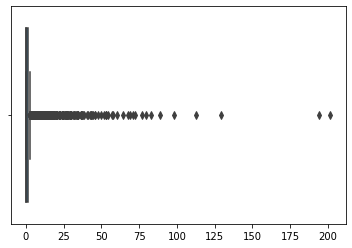

In [169]:
sns.boxplot(reg_predict);

## Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
gb = GradientBoostingRegressor(random_state=42)

In [159]:

gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
gb_predict = gb.predict(X_test)

In [161]:
gb_predict

array([ 0.03258195, -0.00624834, -0.01145717, ...,  0.33309813,
       -0.01397378, -0.01372323])

In [0]:
gb_predict[gb_predict < 0 ] = 0

In [163]:
gb_predict

array([0.03258195, 0.        , 0.        , ..., 0.33309813, 0.        ,
       0.        ])

In [0]:
results2 = pd.DataFrame()
results2['revenue'] = y_test
results2['predict'] = gb_predict
results2['error'] = gb_predict - y_test

In [165]:
results2[results2.revenue > 0]

,revenue,predict,error
3006,32.49,45.327855,12.837855
5928,74.85,0.000000,-74.850000
8361,424.50,35.719843,-388.780157
8612,55.99,21.127794,-34.862206
416,15.19,17.601136,2.411136
4077,5.97,9.941365,3.971365
8146,27.19,25.886259,-1.303741
4908,372.65,50.353001,-322.296999
9395,29.98,16.879785,-13.100215
8728,101.95,177.071616,75.121616


In [166]:
np.sqrt(mean_squared_error(y_test,gb_predict))

23.09413632899293